<a href="https://colab.research.google.com/github/subratmahavoi/Web-Scrapping-of-Indeed-for-Data-scientist-Jobs/blob/main/Web_Scraping_of_%22Data_Scientist%22_Job_from_Indeed_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I made this project on jupyter notebook using anaconda because selenium was not working on google collab. so please check on Jupyter if possible. Thank You

# **Project Name**
**Web Scraping of "Data Scientist" Job from Indeed.com**

# **Contribution**
**Subrat Mahavoi**(Individual)

# **Github Link**
**https://github.com/subratmahavoi/Web-Scrapping-of-Indeed-for-Data-scientist-Jobs**


# **Problem Statement**
**Navigating the Data Science Job Landscape**

# Key Components:

1. **Web Scraping Engine:**

> Utilize Python and libraries like Scrapy, BeautifulSoup, and Selenium to build a robust web scraping engine.

>  It scrapes data science job postings from various online platforms, such as LinkedIn Jobs, Indeed, Naukri, Glassdoor, and AngelList.

2. **Data Extraction and Cleansing:**

> Extract critical information from job listings, including job titles, company names, job descriptions, salaries and locations.

> Implement data cleansing to remove duplicates, inconsistencies, and irrelevant information.

> Store the extracted data in a structured database (MySQL or PostgreSQL) for efficient retrieval and analysis. But i have to store it as a **"Excel data"** to do the analysis.

3. **Data Analysis and Visualization:**

> Utilize Python libraries such as Pandas, Matplotlib, and Seaborn for data analysis.

> Develop captivating charts, graphs, and visual representations to illustrate distribution of Job Titles, Distribution of Companies for data scientist related jobs, salary variations is mentioned in data, Distribution of Job Locations and emerging skill demands using world cloud with Job Description column.

> Create interactive dashboards that allow users to filter data by location, experience level, or industry.


# **Impact and Benefits:**

> Empower data science professionals with real-time insights into the job market, helping them make informed career decisions.

> Enhance job seekers' success by providing easy access to relevant job listings and emerging skill trends.

> Support recruiters in staying informed about industry trends and identifying qualified candidates.

> Bridge the gap between job seekers and employers, benefiting the data science community as a whole.

> Offer room for expansion and continuous improvement to cater to the evolving data science job landscape, ensuring long-term relevance and utility.

# Web Scraping Indeed.com

In [ ]:
import pandas as pd
import random
import time
from parsel import Selector
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import StaleElementReferenceException


chrome_options = Options()

Server = "https://in.indeed.com/jobs?q=Data+Scientist&l=India&start=0&vjk=3f3b2145fd699b37&advn=5727371618394530"

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument(f'--URL={Server}')

driver = webdriver.Chrome(options=chrome_options)

Job_data = []

for page in range(0,50,10):

  driver.get(f'https://in.indeed.com/jobs?q=Data+Scientist&l=India&start={page}')
  time.sleep(random.uniform(8.5, 10.9))

  try:
    close = driver.find_element(By.XPATH, '//button[@class = "jobsearch-ClosableViewJobPage-button-close css-1ge0ifo e8ju0x51"]') # Have to find the exact http so that i will not get error

    close.click()

  except:
    pass

  jobs = driver.find_elements(By.XPATH,'//div[@class = "css-1m4cuuf e37uo190"]')

  for job in jobs:
    try:
        job.location_once_scrolled_into_view
        job.click()
        time.sleep(random.uniform(4.6, 6.9))

        try:
            # Code for 'Job Title' here.
            Job_title = driver.find_element(By.XPATH, '//h2[@class="jobsearch-JobInfoHeader-title css-161nklr e1tiznh50"]/span').text.strip()
            title = Job_title.split('\n')
        except:
            title = 'N/A'  # or any default value

        try:
            # Code for 'Company Name' here.
            Company_Name = driver.find_element(By.XPATH,'//span[@class="css-1cxc9zk e1wnkr790"]/a').text.strip()
            company = Company_Name.split('\n')
        except:
            company = 'N/A'  # or any default value

        try:
            # Code for 'Location' here.
            Location = driver.find_element(By.XPATH, '//div[@data-testid="inlineHeader-companyLocation"]/div').text.strip()
            loc = Location.split('\n')
        except:
            loc = 'N/A'

        try:
            # Find the element containing the desired text
            Salary = driver.find_element(By.XPATH, '//div[@class="css-g6kqeb ecydgvn0"]')

            # Get the text from the element
            salary = Salary.text
        except:
            salary = 'N/A'

        try:
            # Code for 'job_description_element' here
            Job_Description = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]')
            job_description_text = Job_Description.text
            #print(job_description_text)
        except:
            job_description_text = 'N/A'

        data = {'Job_title': title, 'Company_Name': company, 'Location': loc, 'Salary': salary, 'Job_Description': job_description_text}
        Job_data.append(data)
        print('[*] Saving Job Data')

    except StaleElementReferenceException:
        # Handle the stale element by locating it again or taking other appropriate action
        pass

df = pd.DataFrame(Job_data)
df
df.to_excel('Indeed_Job_Data_2.xlsx')

driver.quit()

[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data
[*] Saving Job Data


# Data Cleaning

In [ ]:
df = pd.read_excel("Indeed_Job_Data_2.xlsx")
df

,Unnamed: 0,Job_title,Company_Name,Location,Salary,Job_Description
0,0,"['Data Scientist', '- job post']",['Sorigin Group'],"['Pune, Maharashtra']",NaN,Deputy Manager\nPune\nPosted 11 months ago\nKe...
1,1,"['Data Scientist', '- job post']",['Puneri Pattern'],['Maharashtra'],NaN,"Data Scientist: Data science without a doubt, ..."
2,2,"['Data science trainer', '- job post']",['IT Education'],"['Pune, Maharashtra']","₹20,000 - ₹50,000 a month",We are seeking for Data Science Trainer who ha...
3,3,"['Data Scientist', '- job post']",['Hookfish'],"['Mumbai, Maharashtra']",NaN,We are looking for a data scientist that will ...
4,4,"['Data Scientist', '- job post']",['Siemens'],"['Goa, Goa']",Full-time,Smart Infrastructure Division in Siemens Ltd. ...
5,5,"['Data Scientist-Hyderabad - Job opportunity',...",['Initiate first information services'],"['Hyderabad, Telangana']",Full-time,Primary Responsibilities:\n- Exceptional worki...
6,6,['BIG DATA ( ANALYTICS AND DATA SCIENCE ) - BI...,['Zensar Technologies'],"['Pune, Maharashtra']",NaN,Hands on experience with the Snowflake platfor...
7,7,"['Senior Associate - Data Scientist', '- job p...",['BNP Paribas'],"['Mumbai, Maharashtra']",Full-time,SENIOR ASSOCIATE - DATA SCIENTIST (JOB NUMBER:...
8,8,"['Senior Data Scientist', '- job post']",['SS Supply Chain Solutions'],"['Pune, Maharashtra']","₹10,00,000 - ₹35,00,000 a year",Sr. Data Scientist\n\nResponsibility\nUndertak...
9,9,"['Data Scientist', '- job post']",['Tata Insights and Quants'],"['Mumbai, Maharashtra']",NaN,COMPANY OVERVIEW\nTata Group is an Indian mult...


In [ ]:
# Above we can see there is an unnecessary column named "Unnamed: 0", which has no purpose. so we can drop it and look for total NaN Values.
df = df.drop("Unnamed: 0", axis=1)
df

,Job_title,Company_Name,Location,Salary,Job_Description
0,"['Data Scientist', '- job post']",['Sorigin Group'],"['Pune, Maharashtra']",NaN,Deputy Manager\nPune\nPosted 11 months ago\nKe...
1,"['Data Scientist', '- job post']",['Puneri Pattern'],['Maharashtra'],NaN,"Data Scientist: Data science without a doubt, ..."
2,"['Data science trainer', '- job post']",['IT Education'],"['Pune, Maharashtra']","₹20,000 - ₹50,000 a month",We are seeking for Data Science Trainer who ha...
3,"['Data Scientist', '- job post']",['Hookfish'],"['Mumbai, Maharashtra']",NaN,We are looking for a data scientist that will ...
4,"['Data Scientist', '- job post']",['Siemens'],"['Goa, Goa']",Full-time,Smart Infrastructure Division in Siemens Ltd. ...
5,"['Data Scientist-Hyderabad - Job opportunity',...",['Initiate first information services'],"['Hyderabad, Telangana']",Full-time,Primary Responsibilities:\n- Exceptional worki...
6,['BIG DATA ( ANALYTICS AND DATA SCIENCE ) - BI...,['Zensar Technologies'],"['Pune, Maharashtra']",NaN,Hands on experience with the Snowflake platfor...
7,"['Senior Associate - Data Scientist', '- job p...",['BNP Paribas'],"['Mumbai, Maharashtra']",Full-time,SENIOR ASSOCIATE - DATA SCIENTIST (JOB NUMBER:...
8,"['Senior Data Scientist', '- job post']",['SS Supply Chain Solutions'],"['Pune, Maharashtra']","₹10,00,000 - ₹35,00,000 a year",Sr. Data Scientist\n\nResponsibility\nUndertak...
9,"['Data Scientist', '- job post']",['Tata Insights and Quants'],"['Mumbai, Maharashtra']",NaN,COMPANY OVERVIEW\nTata Group is an Indian mult...


In [ ]:
# Check for rows with NaN values
NaN_rows = df[df.isna().any(axis=1)]
NaN_rows

,Job_title,Company_Name,Location,Salary,Job_Description
0,"['Data Scientist', '- job post']",['Sorigin Group'],"['Pune, Maharashtra']",NaN,Deputy Manager\nPune\nPosted 11 months ago\nKe...
1,"['Data Scientist', '- job post']",['Puneri Pattern'],['Maharashtra'],NaN,"Data Scientist: Data science without a doubt, ..."
3,"['Data Scientist', '- job post']",['Hookfish'],"['Mumbai, Maharashtra']",NaN,We are looking for a data scientist that will ...
6,['BIG DATA ( ANALYTICS AND DATA SCIENCE ) - BI...,['Zensar Technologies'],"['Pune, Maharashtra']",NaN,Hands on experience with the Snowflake platfor...
9,"['Data Scientist', '- job post']",['Tata Insights and Quants'],"['Mumbai, Maharashtra']",NaN,COMPANY OVERVIEW\nTata Group is an Indian mult...
12,"['Data Science', '- job post']",['Infosys'],"['Bengaluru, Karnataka']",NaN,• Anchor ML development track in a client proj...
18,"['Data Scientist', '- job post']",['Hookfish'],"['Mumbai, Maharashtra']",NaN,We are looking for a data scientist that will ...
23,"['Data Scientist', '- job post']",['Optimum Data Analytics'],"['Pune, Maharashtra']",NaN,Optimum Data Analytics (ODA) is looking for a ...
24,"['Data Scientist', '- job post']",['Exeliq Consulting'],"['Kandivali, Mumbai, Maharashtra']",NaN,Currently we are looking for a Senior Computer...
25,"['Jr.Data Scientist / ML Engineer', '- job post']",['AppsTek Corp'],"['Hyderabad, Telangana']",NaN,Requirements:\n2+ years’ experience working as...


In [ ]:
# Count the total number of NaN values in all columns
NaN_count = df.isna().sum().sum()
NaN_count

10

In [ ]:
df.loc[[0, 29], 'Job_title'] = 'Data Scientist Related'
df.loc[[0,1, 3, 6, 9, 12, 18, 23, 24, 25], 'Salary'] = 'Not Disclosed'
df

,Job_title,Company_Name,Location,Salary,Job_Description
0,Data Scientist Related,['Sorigin Group'],"['Pune, Maharashtra']",Not Disclosed,Deputy Manager\nPune\nPosted 11 months ago\nKe...
1,"['Data Scientist', '- job post']",['Puneri Pattern'],['Maharashtra'],Not Disclosed,"Data Scientist: Data science without a doubt, ..."
2,"['Data science trainer', '- job post']",['IT Education'],"['Pune, Maharashtra']","₹20,000 - ₹50,000 a month",We are seeking for Data Science Trainer who ha...
3,"['Data Scientist', '- job post']",['Hookfish'],"['Mumbai, Maharashtra']",Not Disclosed,We are looking for a data scientist that will ...
4,"['Data Scientist', '- job post']",['Siemens'],"['Goa, Goa']",Full-time,Smart Infrastructure Division in Siemens Ltd. ...
5,"['Data Scientist-Hyderabad - Job opportunity',...",['Initiate first information services'],"['Hyderabad, Telangana']",Full-time,Primary Responsibilities:\n- Exceptional worki...
6,['BIG DATA ( ANALYTICS AND DATA SCIENCE ) - BI...,['Zensar Technologies'],"['Pune, Maharashtra']",Not Disclosed,Hands on experience with the Snowflake platfor...
7,"['Senior Associate - Data Scientist', '- job p...",['BNP Paribas'],"['Mumbai, Maharashtra']",Full-time,SENIOR ASSOCIATE - DATA SCIENTIST (JOB NUMBER:...
8,"['Senior Data Scientist', '- job post']",['SS Supply Chain Solutions'],"['Pune, Maharashtra']","₹10,00,000 - ₹35,00,000 a year",Sr. Data Scientist\n\nResponsibility\nUndertak...
9,"['Data Scientist', '- job post']",['Tata Insights and Quants'],"['Mumbai, Maharashtra']",Not Disclosed,COMPANY OVERVIEW\nTata Group is an Indian mult...


In [ ]:
# Droping rows where all values are N/A
df.dropna(how='all', inplace=True)
df

,Job_title,Company_Name,Location,Salary,Job_Description
0,Data Scientist Related,['Sorigin Group'],"['Pune, Maharashtra']",Not Disclosed,Deputy Manager\nPune\nPosted 11 months ago\nKe...
1,"['Data Scientist', '- job post']",['Puneri Pattern'],['Maharashtra'],Not Disclosed,"Data Scientist: Data science without a doubt, ..."
2,"['Data science trainer', '- job post']",['IT Education'],"['Pune, Maharashtra']","₹20,000 - ₹50,000 a month",We are seeking for Data Science Trainer who ha...
3,"['Data Scientist', '- job post']",['Hookfish'],"['Mumbai, Maharashtra']",Not Disclosed,We are looking for a data scientist that will ...
4,"['Data Scientist', '- job post']",['Siemens'],"['Goa, Goa']",Full-time,Smart Infrastructure Division in Siemens Ltd. ...
5,"['Data Scientist-Hyderabad - Job opportunity',...",['Initiate first information services'],"['Hyderabad, Telangana']",Full-time,Primary Responsibilities:\n- Exceptional worki...
6,['BIG DATA ( ANALYTICS AND DATA SCIENCE ) - BI...,['Zensar Technologies'],"['Pune, Maharashtra']",Not Disclosed,Hands on experience with the Snowflake platfor...
7,"['Senior Associate - Data Scientist', '- job p...",['BNP Paribas'],"['Mumbai, Maharashtra']",Full-time,SENIOR ASSOCIATE - DATA SCIENTIST (JOB NUMBER:...
8,"['Senior Data Scientist', '- job post']",['SS Supply Chain Solutions'],"['Pune, Maharashtra']","₹10,00,000 - ₹35,00,000 a year",Sr. Data Scientist\n\nResponsibility\nUndertak...
9,"['Data Scientist', '- job post']",['Tata Insights and Quants'],"['Mumbai, Maharashtra']",Not Disclosed,COMPANY OVERVIEW\nTata Group is an Indian mult...


In [ ]:
# Count the total number of NaN values in all columns
NaN_count_Final = df.isna().sum().sum()
NaN_count_Final

0

In [ ]:
# Checking total number of rows & columns in the dataset
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 30
Number of columns: 5


In [ ]:
# Details of the Job_Description
detail = df.loc[0, 'Job_Description']
print(detail)

Deputy Manager
Pune
Posted 11 months ago
Key Job Roles and Responsibilities:
1. Self-motivated, and have demonstrated abilities to think independently as a data scientist.
2. Structure your data science approach according to the necessary task, while appropriately applying the correct level of model complexity to the problem at hand
3. Identify valuable data sources and automate collection processes
4. Undertake pre-processing of structured and unstructured data
5. Analyse large amounts of information to discover trends and patterns
6. Build predictive models and machine-learning algorithms
7. Present information using data visualization techniques
8. Propose solutions and strategies to business challenges
9. Collaborate with engineering and product development teams
10. Analytical mind and business acumen
11. Ability to spin up quick visualization prototypes in Power BI, Qliksense, or other similar tools is preferred. Experience with R-Shiny, Bokeh, Django, or JavaScript is a plus. Te

In [ ]:
# Saving the data after cleaning
df.to_excel("Final_Indeed_Job_Data.xlsx", index=False)
df

,Job_title,Company_Name,Location,Salary,Job_Description
0,Data Scientist Related,['Sorigin Group'],"['Pune, Maharashtra']",Not Disclosed,Deputy Manager\nPune\nPosted 11 months ago\nKe...
1,"['Data Scientist', '- job post']",['Puneri Pattern'],['Maharashtra'],Not Disclosed,"Data Scientist: Data science without a doubt, ..."
2,"['Data science trainer', '- job post']",['IT Education'],"['Pune, Maharashtra']","₹20,000 - ₹50,000 a month",We are seeking for Data Science Trainer who ha...
3,"['Data Scientist', '- job post']",['Hookfish'],"['Mumbai, Maharashtra']",Not Disclosed,We are looking for a data scientist that will ...
4,"['Data Scientist', '- job post']",['Siemens'],"['Goa, Goa']",Full-time,Smart Infrastructure Division in Siemens Ltd. ...
5,"['Data Scientist-Hyderabad - Job opportunity',...",['Initiate first information services'],"['Hyderabad, Telangana']",Full-time,Primary Responsibilities:\n- Exceptional worki...
6,['BIG DATA ( ANALYTICS AND DATA SCIENCE ) - BI...,['Zensar Technologies'],"['Pune, Maharashtra']",Not Disclosed,Hands on experience with the Snowflake platfor...
7,"['Senior Associate - Data Scientist', '- job p...",['BNP Paribas'],"['Mumbai, Maharashtra']",Full-time,SENIOR ASSOCIATE - DATA SCIENTIST (JOB NUMBER:...
8,"['Senior Data Scientist', '- job post']",['SS Supply Chain Solutions'],"['Pune, Maharashtra']","₹10,00,000 - ₹35,00,000 a year",Sr. Data Scientist\n\nResponsibility\nUndertak...
9,"['Data Scientist', '- job post']",['Tata Insights and Quants'],"['Mumbai, Maharashtra']",Not Disclosed,COMPANY OVERVIEW\nTata Group is an Indian mult...


In [ ]:
import matplotlib.pyplot as plt

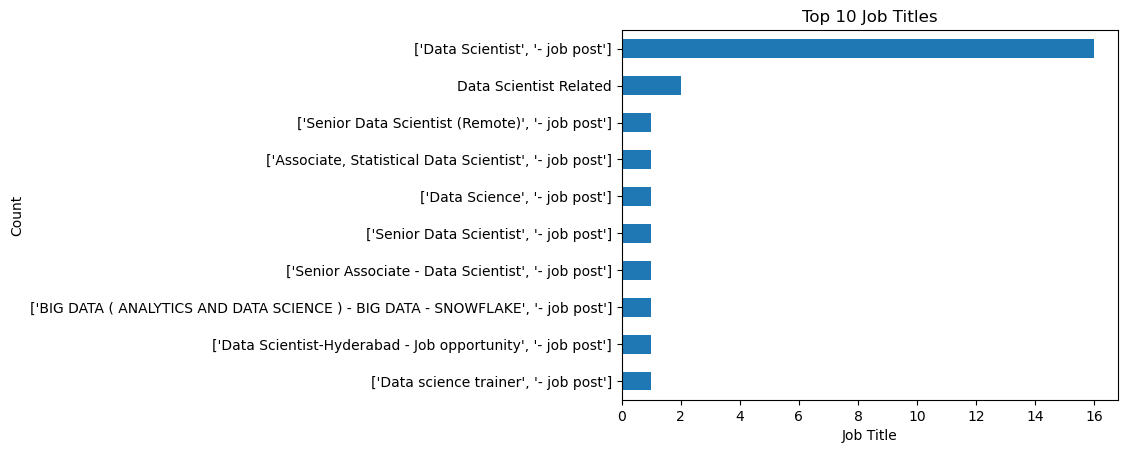

In [ ]:
job_title_counts = df['Job_title'].value_counts()
job_title_counts = job_title_counts[:10].sort_values(ascending=True)  # Sort in Ascending order
job_title_counts[:10].plot(kind='barh')  # Use 'barh' for horizontal bar chart
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')  # Swap the labels if you want the job titles on the y-axis
plt.show()

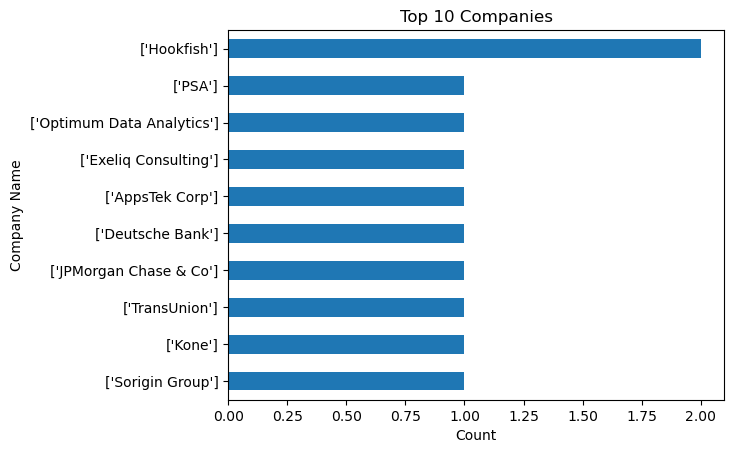

In [ ]:
company_counts = df['Company_Name'].value_counts()
company_counts = company_counts[:10].sort_values(ascending=True)  # Sort in Ascending order
company_counts[:10].plot(kind='barh')
plt.title('Top 10 Companies')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()

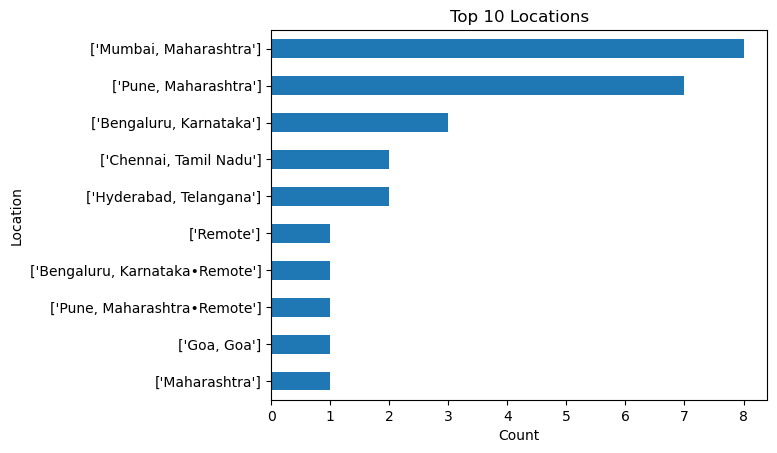

In [ ]:
location_counts = df['Location'].value_counts()
location_counts = location_counts[:10].sort_values(ascending=True)  # Sort in Ascending order
location_counts[:10].plot(kind='barh')
plt.title('Top 10 Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

**Job Description Analysis Below**

To gain insights from job descriptions, I created a word cloud to visualize the most common words. I also performed text analysis to extract key phrases or keywords from job descriptions.

In [ ]:
!pip install wordcloud

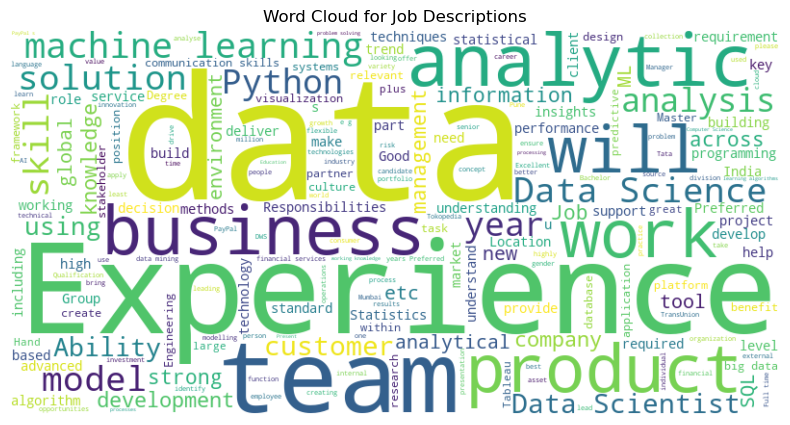

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Job_Description']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Descriptions')
plt.show()

## Conclusion

Web scraping is indeed a powerful technique for efficiently extracting data from websites, particularly when dealing with large datasets. This project demonstrated the ability to collect data from multiple pages by automating the process through loops and URL parameter adjustments, making it possible to seamlessly gather information from numerous pages.

The internet contains a vast wealth of data, but much of it is not readily available in easily accessible formats. When data is too extensive to be collected manually, web scraping emerges as a valuable tool for data retrieval and analysis. It enables access to and utilization of online data for various purposes, including research, business intelligence, and decision-making.

Web scraping offers not only time-saving benefits but also the automation of repetitive tasks, making it an indispensable skill for data professionals and researchers. However, it's essential to approach web scraping ethically and responsibly by adhering to website terms of service and legal regulations. This ensures the integrity and legality of the data extraction process, maintaining a balance between data accessibility and the rights of website owners.